<a href="https://colab.research.google.com/github/huda-nur-ed/YES_BANK_STOCK_CLOSING_PRICE_PREDICTION/blob/main/F_M_Nurul_Huda_Capstone_Project_YES_BANK_STOCK_CLOSING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset 'data_YesBank_StockPrices.csv'
path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 4/Capstone_Projects/data_YesBank_StockPrices.csv'
df = pd.read_csv(path)

In [5]:
# Get the first 5 observations
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [10]:
# Get the last 5 observations
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


From the above observations, we can say that this dataset has the Open,High,Low and Close prices for 184 months starting from July 2005 and ending in November 2020.

In [6]:
# Get a brief summary on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


From the  brief summary of the dataset,we observe that that
*   it has 1 categorical columns and there are 4 numerical ones columns.
*   there is no missing value in the dataset.



In [9]:
# Get statistical summary on the dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


From the above statistical summary description of the columns, we observe that-
*   average Opening Yes bank stock price is 105.54 for the 184 months and Closing price have an average of 105.205.
*   the highest stock price recorded in any of the 184 months is 404 while the lowest stock price recorded is 5.55.
* minimum Opening stock price is 10 while that of highest Opening stock price is 369.95.
* minimum Closing stock price is 9.98 while that of highest Closing stock price is 367.9.



##Exploratory Data Analysis

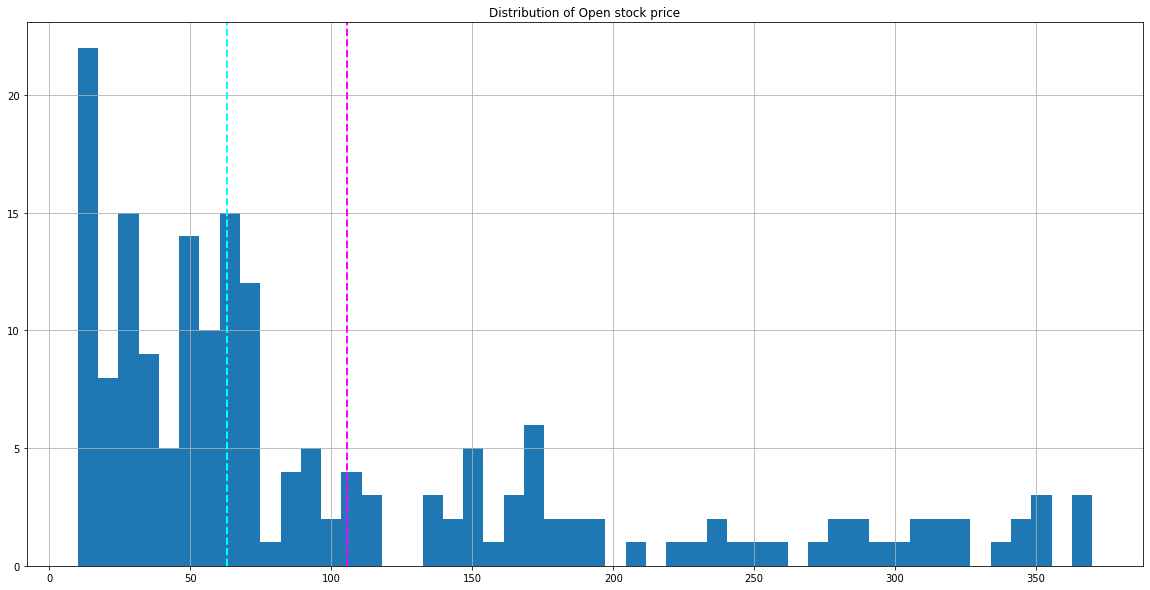

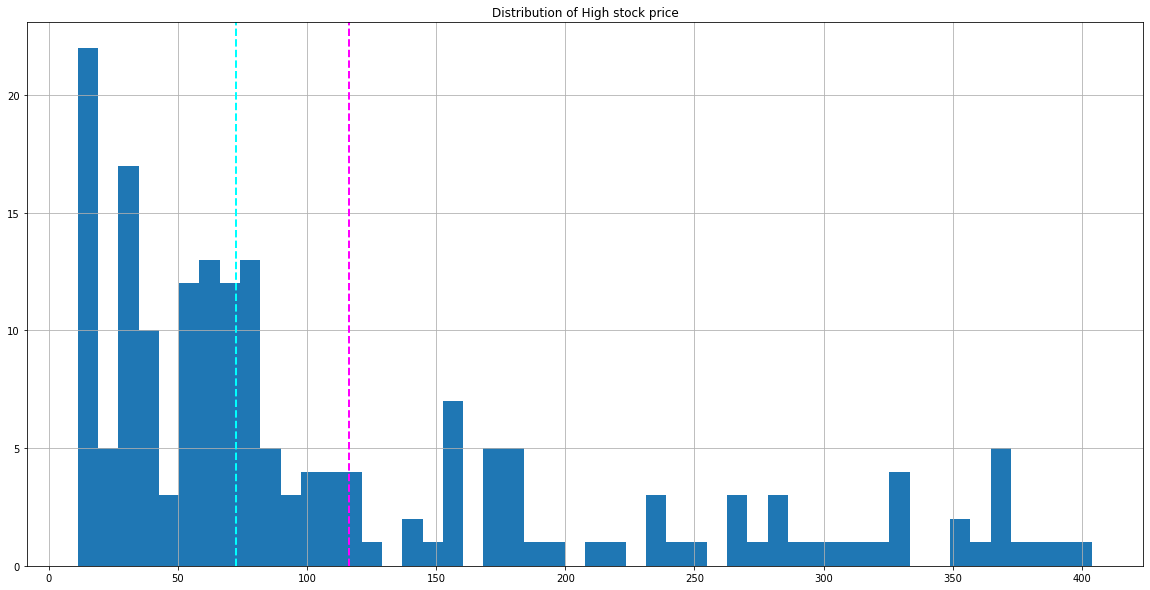

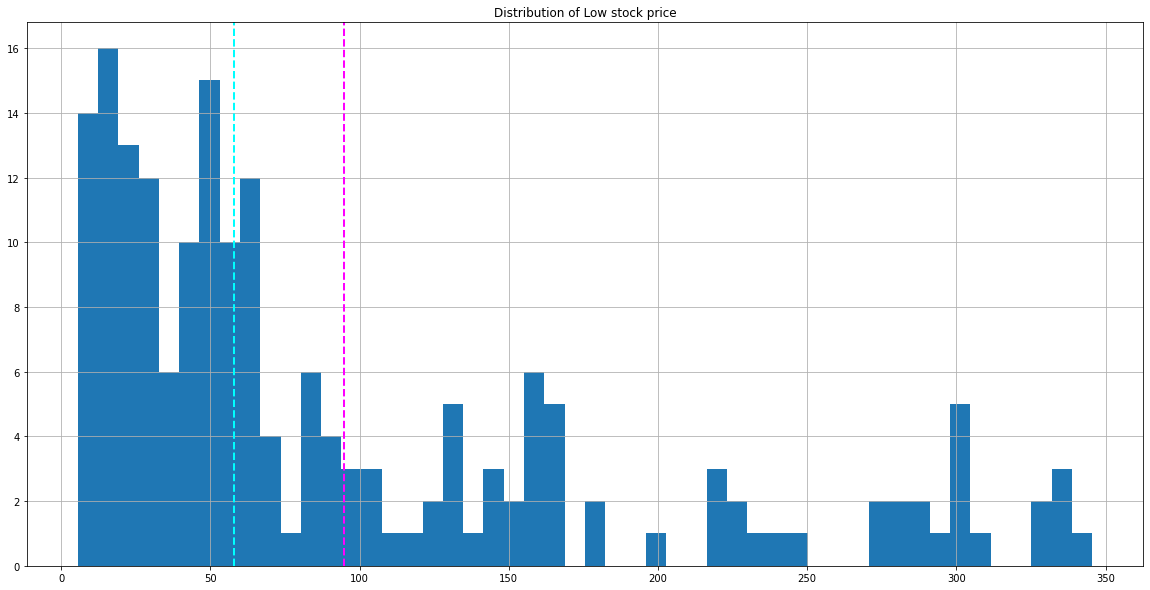

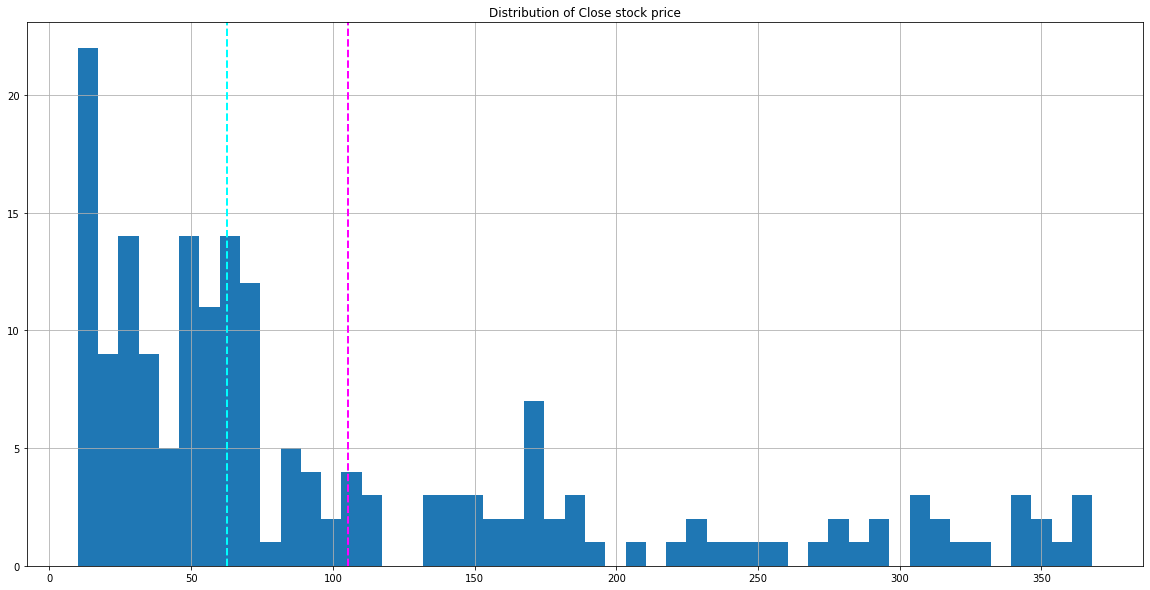

In [23]:
# Get distribution of Open,High,Low,Close stock price using histogram
for col in df.columns[1:]:
    fig = plt.figure(figsize=(20, 10))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(f'Distribution of {col} stock price')

From the above histogram distribution of different columns, we have observe that

*   Most of the months, stock Opening and Closing price are less than 70.
*   Stock Opening and Closing price more than 100 is observed in fewer months.
*   In most of the months,the stock price can go as high as 80 while its low is less than 60.

